# Initiation the random points

In [81]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs

In [82]:
# 500.2 matrix 
X,y = make_blobs(n_samples = 500, n_features= 2 , centers = 5, random_state = 3 )

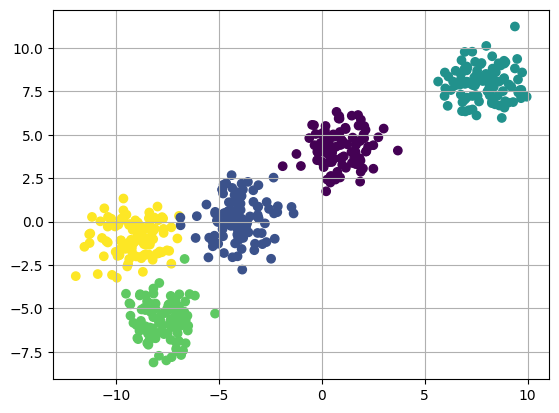

In [83]:
fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0], X[:,1], c = y) # X and y co ordinate , y is random 0-4 numbers
plt.show()

In [84]:
center = 10*(2*np.random.random(X.shape[1],)-1) # generate random X and Y co-ordinates 

In [85]:
k = 5

colors = ["green", "yellow", "blue", "cyan", "red"]

clusters = {}   # clusters will stored in this dictionary 

for idx in range(k):
        center = 10*(2*np.random.random(X.shape[1],)-1)
        point = []
        cluster = {
            'center': center,
            'points': [],
            'color' : colors[idx]
        }
        clusters[idx] = cluster 

In [86]:
clusters

{0: {'center': array([-4.76698227, -6.37712369]),
  'points': [],
  'color': 'green'},
 1: {'center': array([-3.0321252 , -9.39047285]),
  'points': [],
  'color': 'yellow'},
 2: {'center': array([2.99680963, 5.05147014]), 'points': [], 'color': 'blue'},
 3: {'center': array([-0.19827042, -6.1451527 ]),
  'points': [],
  'color': 'cyan'},
 4: {'center': array([-2.8805292 ,  8.71499858]),
  'points': [],
  'color': 'red'}}

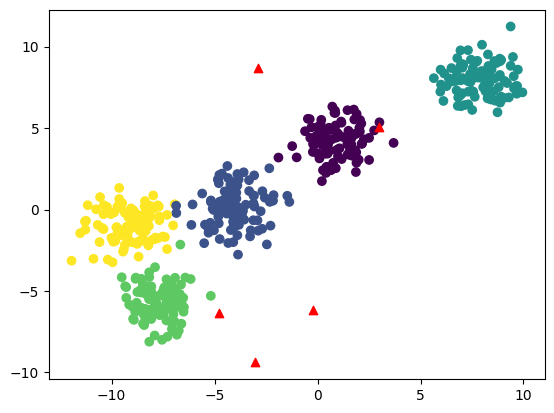

In [87]:
plt.scatter(X[:,0],X[:,1], c = y )  # previous scatterplot

# assign the points in this scatter plot 
for i in clusters : 
    center = clusters[i]['center']
    plt.scatter(center[0] , center[1] , marker = '^', c = 'red')
plt.show()

## Step -2 : Assign each point to the nearest center 

In [92]:
#create a distance function 
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2)) # same as root mean square error 

In [93]:
v1 = np.array([1,2])
v2 = np.array([3,4])
distance(v1,v2)

2.8284271247461903

In [127]:
# Implementattion of E step   (Assigning the cluster to every data point) 
def assign_clusters():                  # creat assign_cluster function 
    for idx in range(X.shape[0]) :     # run loop for X.shape[0]
        dist = []                        #create an empty list for adding distance 

        curr_x = X[idx]                 # each value of the cluster

        for i in range(k):                               # k is number of clusters 
            dis = distance(curr_x,clusters[i]['center'])  #adding distance values 
            dist.append(dis)
        curr_cluster = np.argmin(dist)                    # gives the index of the MINIMUM value
        clusters[curr_cluster]['points'].append(curr_x)

# Implementing the M-step 
def update_clusters():
    for idx in range(k):
        pts = np.array(clusters[idx]['points'])
        if pts.shape[0] > 0:
            new_center = pts.mean(axis = 0)
            clusters[idx]['center'] = new_center

            clusters[idx]['points'] = []

def plot_clusters() :
    for i in clusters : 
        pts = np.array(clusters[i]['points'])
        try : 
             plt.scatter(pts[:,0],pts[:,1], c=clusters[i]['color'])
        except : 
             pass 
        center = clusters[i]['center']
        plt.scatter(center[0],center[1], c = 'black', marker = '^')

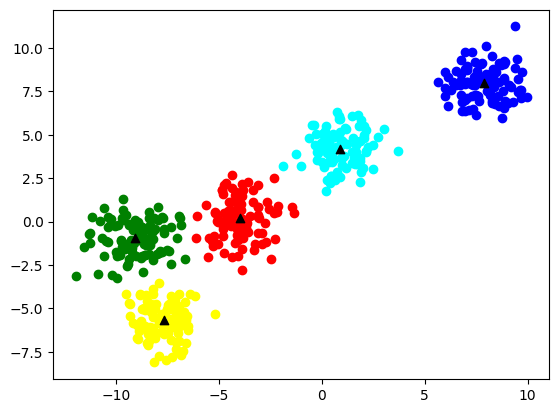

In [128]:
assign_clusters()
plot_clusters()
update_clusters()

In [103]:
#Implementing E step 
def assign_clusters():
    for idx in range(X.shape[0]):
        dist = []
        
        curr_x = X[idx]
        
        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
        
      a  
        
#Implementing the M-Step
def update_clusters():
    for idx in range(k):
        pts = np.array(clusters[idx]['points'])
        if pts.shape[0] > 0:
            new_center = pts.mean(axis =0)
            clusters[idx]['center'] = new_center
            
            clusters[idx]['points'] = []
    
def plot_clusters():
    for i in clusters:
        pts = np.array(clusters[i]['points'])
        try : 
            plt.scatter(pts[:,0],pts[:,1],c=clusters[i]['color'])
        except:
            pass
        center = clusters[i]['center']
        plt.scatter(center[0],center[1],c = 'black',marker = '^')

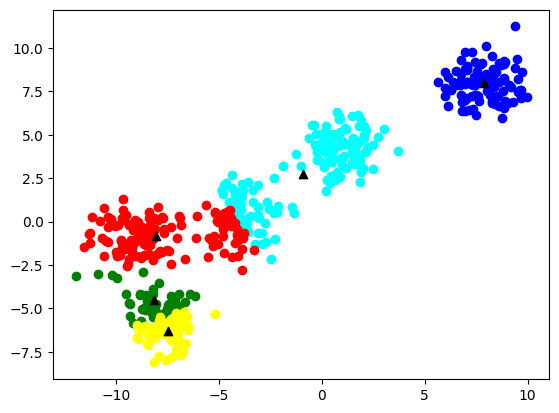

In [104]:

assign_clusters()
plot_clusters()
update_clusters()

# Scikit Learn K- Means 



In [130]:
from sklearn.cluster  import KMeans

In [131]:
km = KMeans(n_clusters = 5)

In [134]:
km.fit(X,y)

C:\Users\acer\AppData\Local\Schrodinger\PyMOL2\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=5)

In [135]:
centers = km.cluster_centers_

In [133]:
X,y = make_blobs(n_samples = 500, n_features= 2, centers =5, random_state=3)

In [136]:
labels = km.labels_

In [137]:
labels


array([0, 1, 3, 0, 0, 3, 4, 0, 1, 0, 1, 3, 1, 0, 3, 0, 1, 0, 0, 1, 2, 2,
       0, 3, 0, 2, 4, 4, 3, 4, 0, 4, 2, 2, 0, 2, 1, 1, 0, 2, 2, 2, 4, 4,
       3, 1, 1, 4, 4, 4, 1, 0, 4, 0, 0, 2, 0, 0, 1, 3, 1, 3, 3, 0, 4, 1,
       3, 3, 2, 3, 2, 0, 2, 0, 2, 3, 0, 4, 2, 2, 3, 2, 3, 4, 1, 4, 3, 1,
       4, 3, 4, 2, 0, 2, 2, 1, 0, 3, 3, 2, 1, 2, 3, 3, 1, 1, 1, 3, 3, 0,
       1, 4, 0, 1, 3, 2, 1, 4, 2, 3, 1, 3, 4, 0, 2, 4, 4, 4, 0, 0, 3, 3,
       0, 1, 1, 4, 3, 4, 3, 0, 0, 2, 3, 1, 4, 0, 1, 1, 0, 3, 0, 0, 3, 3,
       1, 2, 2, 4, 3, 0, 2, 1, 4, 2, 1, 2, 1, 2, 2, 2, 4, 0, 2, 1, 2, 4,
       0, 3, 1, 4, 1, 0, 1, 2, 4, 4, 2, 0, 3, 1, 2, 3, 4, 0, 4, 2, 3, 4,
       0, 0, 0, 2, 2, 1, 0, 4, 4, 0, 1, 0, 0, 0, 2, 1, 3, 1, 0, 0, 1, 4,
       3, 4, 4, 2, 0, 3, 0, 3, 4, 2, 3, 3, 0, 2, 0, 2, 3, 1, 3, 2, 2, 1,
       0, 0, 3, 3, 2, 1, 2, 0, 4, 1, 4, 0, 4, 4, 4, 4, 1, 2, 1, 0, 2, 1,
       4, 3, 1, 1, 1, 4, 0, 0, 3, 2, 2, 1, 3, 3, 0, 3, 4, 3, 1, 1, 4, 4,
       2, 4, 4, 1, 2, 0, 3, 2, 3, 4, 3, 3, 1, 0, 2,

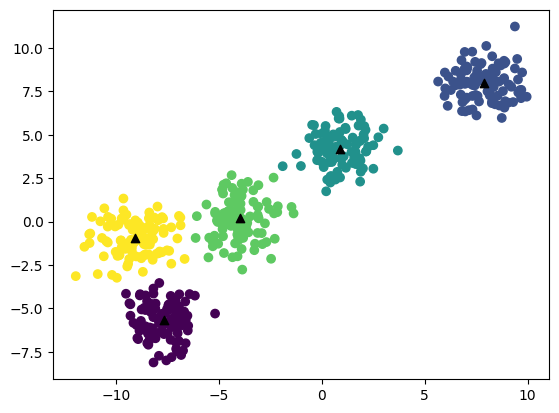

In [141]:
plt.scatter(X[:,0],X[:,1], c= labels)
plt.scatter(centers[:,0],centers[:,1], marker= "^", c= "black")
plt.show()